In [75]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = torch.tensor(5.0)
y = 3 * x ** 2
print(y)

tensor(75.)


In [3]:
x = torch.tensor(5.0, requires_grad=True)
y = 3 * x ** 2
y.backward()
print(x.grad)

tensor(30.)


In [24]:
def rosenbrock(x0, x1):
    y = 100 * (x1 - x0 ** 2) ** 2 + (x0 - 1) ** 2
    return y

In [29]:
x0 = np.linspace(-2, 2, 100)
x1 = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x0, x1)
Z = rosenbrock(X, Y)


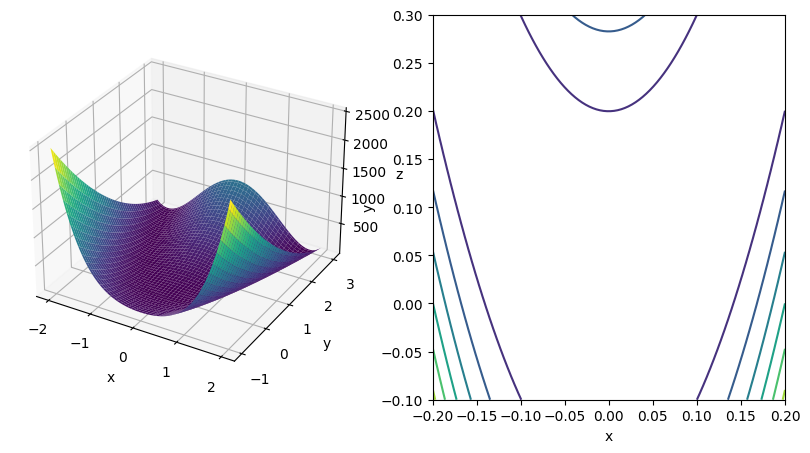

In [47]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.plot_surface(X, Y, Z, cmap='viridis')
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.contour(X, Y, Z)
plt.show()

In [52]:
x0 = torch.tensor(0.0, requires_grad=True)
x1 = torch.tensor(2.0, requires_grad=True)

lr = 0.001
iters = 10000
grads = np.zeros((iters, 2))

for i in range(iters):
    if i % 1000 == 0:
        print(x0.item(), x1.item())
    y = rosenbrock(x0, x1)
    y.backward()
    x0.data -= lr * x0.grad.data
    x1.data -= lr * x1.grad.data
    grads[i, 0] = x0.grad.data
    grads[i, 1] = x1.grad.data

    x0.grad.zero_()
    x1.grad.zero_()

print(x0.item(), x1.item())

0.0 2.0
0.6837119460105896 0.4659528136253357
0.8263181447982788 0.6820318102836609
0.8947840929031372 0.8001903295516968
0.9334872364997864 0.8711214661598206
0.9569892883300781 0.9156519174575806
0.9718162417411804 0.9443121552467346
0.9813804626464844 0.9630323052406311
0.98763507604599 0.9753732085227966
0.9917610883712769 0.983556866645813
0.9944981336593628 0.9890044331550598


In [76]:
class Model(nn.Module):
    def __init__(self, input_size=1, hidden_size=10, output_size=1):
        super().__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        y = self.linear1(x)
        y = F.sigmoid(y)
        y = self.linear2(y)
        return y

model = Model()

In [72]:
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[0.0421]], requires_grad=True)
Parameter containing:
tensor([0.6446], requires_grad=True)


In [67]:
torch.manual_seed(0)
x = torch.rand(100, 1)
y = 2 * x + 5 + torch.rand(100, 1)

W = nn.Parameter(torch.zeros((1, 1), requires_grad=True))
b = nn.Parameter(torch.zeros(1, requires_grad=True))

def predict(x):
    y = x @ W + b
    return y


def mean_squared_error(x0, x1):
    diff = x0 - x1
    N = len(diff)
    return torch.sum(diff ** 2) / N


lr = 0.1
iters = 100

for i in range(iters):
    y_hat = predict(x)
    loss = mean_squared_error(y, y_hat)

    loss.backward()

    W.data -= lr * W.grad.data
    b.data -= lr * b.grad.data

    W.grad.zero_()
    b.grad.zero_()

    if i % 10 == 0:
        print(loss.item())
        print('====')
        print('W = ', W.item())
        print('b = ', b.item())

41.89796447753906
====
W =  0.6656822562217712
b =  1.2871865034103394
0.22483204305171967
====
W =  2.493596315383911
b =  4.935605525970459
0.0925208106637001
====
W =  2.5405941009521484
b =  5.166225433349609
0.0888015553355217
====
W =  2.495894193649292
b =  5.203803539276123
0.08627457916736603
====
W =  2.452197551727295
b =  5.227496147155762
0.08435674756765366
====
W =  2.413858413696289
b =  5.2476396560668945
0.0829005315899849
====
W =  2.3804357051849365
b =  5.265163898468018
0.0817948430776596
====
W =  2.351311445236206
b =  5.28043270111084
0.08095530420541763
====
W =  2.3259332180023193
b =  5.293737888336182
0.08031783998012543
====
W =  2.303818941116333
b =  5.305331707000732


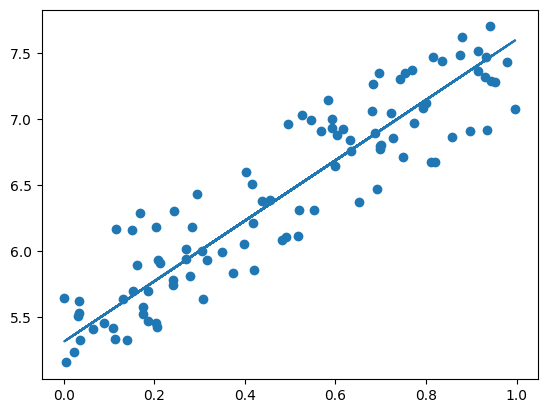

In [68]:
plt.scatter(x, y)
plt.plot(x.data, predict(x).data)
plt.show()

In [94]:
torch.manual_seed(0)
x = torch.rand(100, 1)
y = torch.sin(2 * torch.pi * x) + torch.rand(100, 1)

In [88]:
lr = 0.2
iters = 10000

model = Model()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

for i in range(iters):
    y_pred = model(x)
    loss = F.mse_loss(y, y_pred)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if i % 1000 == 0:
        print(loss.item())


0.7643452286720276
0.23656319081783295
0.23226074874401093
0.22441406548023224
0.21026140451431274
0.17957855761051178
0.11798418313264847
0.08477149903774261
0.08017536997795105
0.07965090870857239


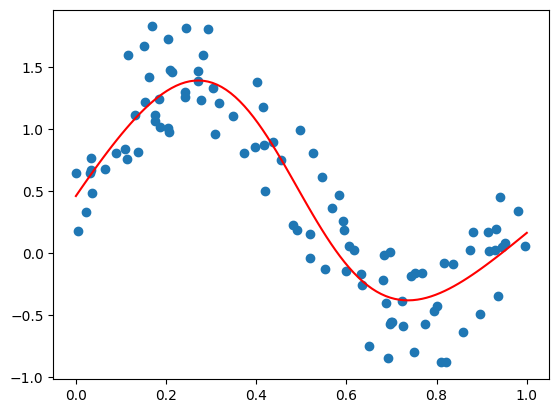

In [95]:
plt.scatter(x, y)
_x = torch.linspace(0, 1, 100).reshape(-1, 1)
_y = model(_x).detach().numpy()
plt.plot(_x, _y, color='red')
plt.show()